In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Data

In [3]:
data = pd.read_excel('dataset_re_full2.xlsx')
#TODO: mudar dataset para um arquivo xlsx para enviar pra Profa.

In [4]:
# datahw01 = data.iloc[60000:64000,:] # 4k do meio
datahw01 = data.iloc[0:4000,:]      # 4k inicio
datahw01.size, datahw01.shape

(32000, (4000, 8))

In [5]:
datahw01.head()

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,-61,68.800003,1048.60,90.0,1,1,0.56,2
1,-61,68.769997,1855.54,90.0,1,1,0.45,3
2,-71,69.169998,1685.62,90.0,1,1,0.51,2
3,-65,69.279999,1770.92,90.0,1,1,0.00,1
4,-103,0.820000,256.07,60.0,1,1,3.35,4


## Unconditional mono-variate analysis

In [6]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
unc_monovar

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-96.589750,7.242425,1151.234110,86.62422,0.990750,1.575250,1.546487
std $\sigma_d$,19.214389,16.969282,3021.213917,68.76919,0.095743,0.522882,1.709382
Skewness $\gamma_d$,0.273029,2.867141,9.818498,8.99465,-10.256526,-0.607759,2.299115


In [7]:
# unc_monovar.to_excel('hw01-results/hw01-data/unc_monovar.xlsx')

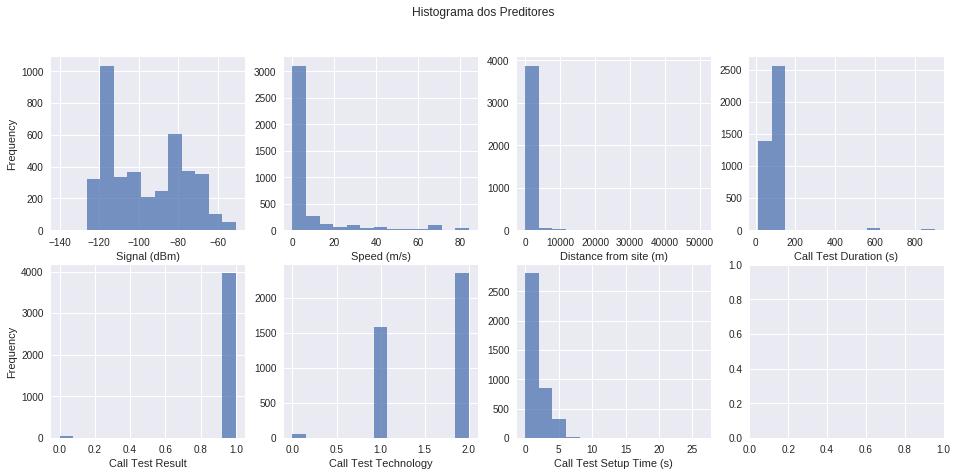

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(0, 7):
    ax[i].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)
#     plt.savefig('hw01-figs/hist_data.pdf')

## Class-conditional mono-variate analysis

In [9]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)']
print('Classe  | Quantidade')
for i in cls.indices:
    print(f'{classes[i-1]} |    {cls.get_group(i).iloc[:,1:].shape[0]}')

Classe  | Quantidade
Bad (1) |    155
Poor (2) |    181
Fair (3) |    864
Good (4) |    2800


In [10]:
cls_monovar = []
for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-80.941935,31.577548,3664.955935,89.383935,0.909677,0.948387,1.600581
std $\sigma_{d|l_1}$,12.426531,30.792243,8421.379477,99.725663,0.287573,0.297032,2.599546
Skewness $\gamma_{d|l_1}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-79.298343,31.374586,4066.876906,174.934088,0.983425,0.922652,1.221050
std $\sigma_{d|l_2}$,10.995931,26.760100,7821.943217,229.661951,0.128025,0.267884,1.836816
Skewness $\gamma_{d|l_2}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-76.068287,8.851280,794.248102,69.983414,0.997685,0.991898,3.471424
std $\sigma_{d|l_3}$,10.113205,16.612288,2331.650249,64.006028,0.048085,0.122466,1.467665
Skewness $\gamma_{d|l_3}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-104.906071,3.838884,933.761854,85.897725,0.993571,1.832143,0.970550
std $\sigma_{d|l_4}$,15.735105,12.052527,1594.345069,31.044137,0.079935,0.395178,1.199660
Skewness $\gamma_{d|l_4}$,-0.792042,0.364759,3.714210,6.154428,-2.886456,-1.474720,3.627016


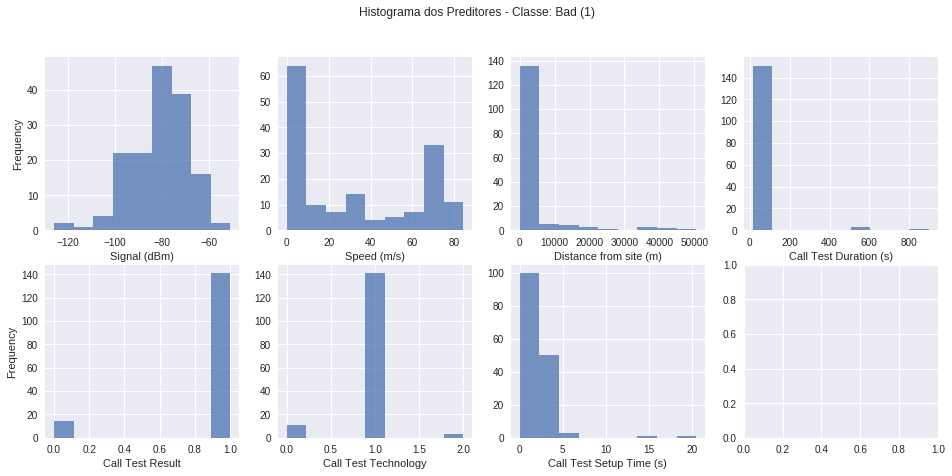

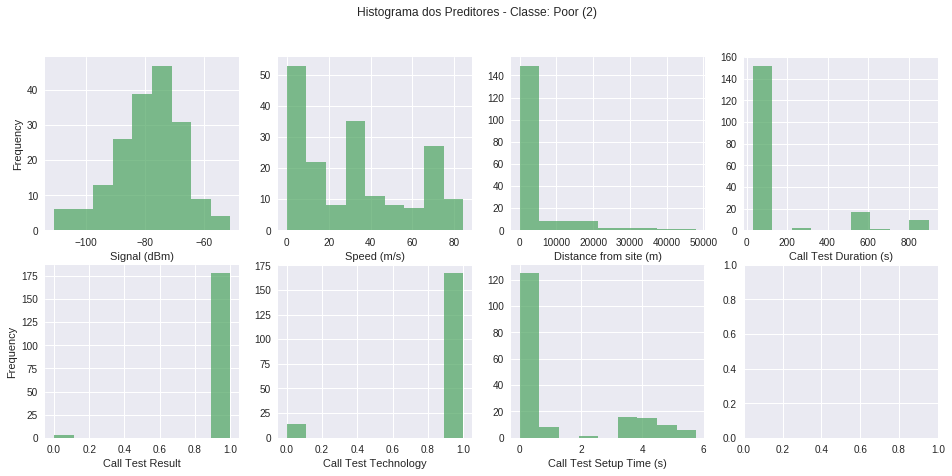

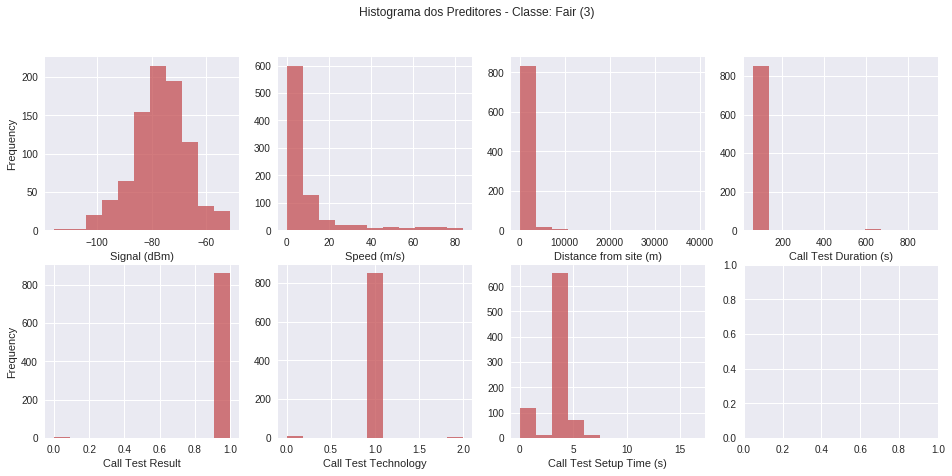

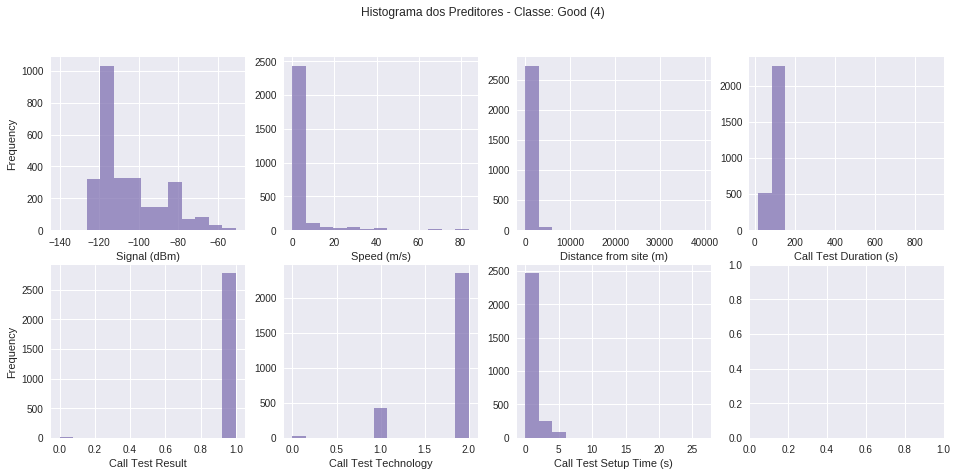

In [11]:
color=['C0','C1','C2','C3']
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[j-1]}')
    for i in range(0, 7):
        ax[i].set_xlabel(cls.get_group(j).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[j-1], alpha=.75)
#     plt.savefig(f'hw01-figs/hist_C{j}.pdf')

## Tranformações no dados

centering and scaling

In [12]:
scaled_datahw01 = datahw01.iloc[:,:-1]
scaled_datahw01 = (scaled_datahw01 - scaled_datahw01.mean())/scaled_datahw01.std()
scaled_datahw01.head()

# Apenas p/ visualização do normalizado
# fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
# ax = ax.ravel()
# fig.suptitle('Histograma dos Preditores')
# for i in range(0, 7):
#     ax[i].set_xlabel(scaled_datahw01.columns[i])
#     ax[0].set_ylabel('Frequency')
#     ax[4].set_ylabel('Frequency')
#     ax[i].hist(scaled_datahw01.iloc[:, i], bins='sturges', alpha=.75)

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
0,1.852245,3.627589,-0.033971,0.049089,0.096613,-1.100152,-0.577102
1,1.852245,3.625820,0.233120,0.049089,0.096613,-1.100152,-0.641452
2,1.331801,3.649393,0.176878,0.049089,0.096613,-1.100152,-0.606352
3,1.644067,3.655875,0.205112,0.049089,0.096613,-1.100152,-0.904705
4,-0.333617,-0.378474,-0.296293,-0.387153,0.096613,-1.100152,1.055067


##  Unconditional bi-variate analysis

Matriz de Correlação e Scatter plot dos preditores

In [13]:
data_pair_corr = scaled_datahw01.corr()
data_pair_corr

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Signal (dBm),1.000000,0.305035,0.039808,-0.065430,0.023676,-0.759307,0.521164
Speed (m/s),0.305035,1.000000,0.313009,0.097791,-0.234168,-0.319119,-0.139659
Distance from site (m),0.039808,0.313009,1.000000,0.128069,-0.111419,-0.137912,-0.130046
Call Test Duration (s),-0.065430,0.097791,0.128069,1.000000,-0.010266,-0.019044,-0.254634
Call Test Result,0.023676,-0.234168,-0.111419,-0.010266,1.000000,0.056365,0.035601
Call Test Technology,-0.759307,-0.319119,-0.137912,-0.019044,0.056365,1.000000,-0.604043
Call Test Setup Time (s),0.521164,-0.139659,-0.130046,-0.254634,0.035601,-0.604043,1.000000


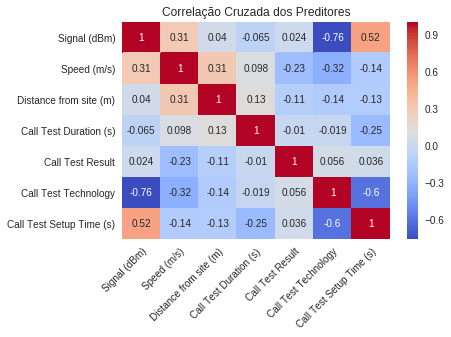

In [14]:
ax = sns.heatmap(data_pair_corr, annot=True, cmap='coolwarm')
ax.set_title('Correlação Cruzada dos Preditores')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig = ax.get_figure()
plt.show()
# fig.savefig('hw01-figs/data_corr.pdf', bbox_inches='tight')

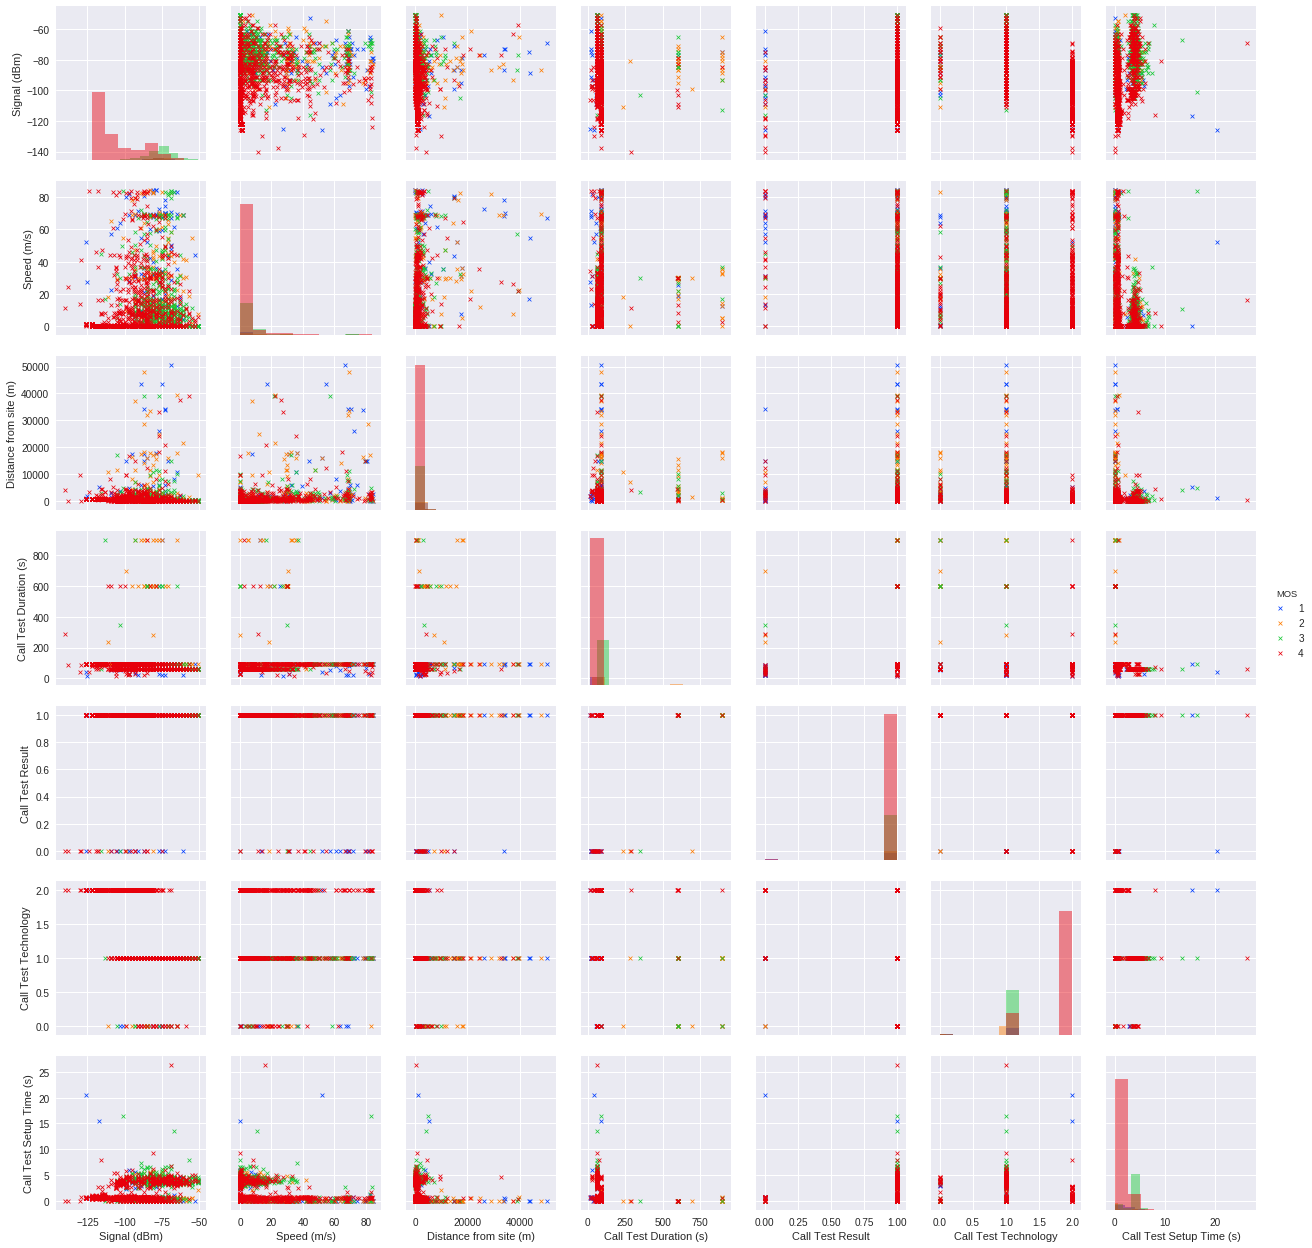

In [15]:
ax = sns.pairplot(datahw01, hue='MOS', palette='bright', vars=datahw01.columns[:-1], 
                  diag_kind='hist', plot_kws={"s": 15, "marker": 'x'}, diag_kws={"alpha": 0.45})
# ax.fig.savefig('hw01-figs/data_scatter.png', dpi=400)

## Q4 PCA Unconditional multi-variate analysis

usando ```scaled_datahw01```

Perform an unconditional multi-variate analysis of the predictors. Specifically, you
must perform a principal components analysis of the predictors, retain only the
first two principal components (those associated with the two largest eigenvalues)
and plot the scatter plot of the projected observations. Again, for each projected
point (observation) you must use colours or symbols to indicate the associated class
label. [Remember to perform the necessary pre-processing of the data]
Are the classes well (or better) separated? Are the boundaries between classes linear?
What classes show a high degree of overlap and thus are harder to separate?

In [16]:
# dado ja normalizado -> tira a COV
np.set_printoptions(4)
mt_cov = scaled_datahw01.cov().values
mt_cov

array([[ 1.    ,  0.305 ,  0.0398, -0.0654,  0.0237, -0.7593,  0.5212],
       [ 0.305 ,  1.    ,  0.313 ,  0.0978, -0.2342, -0.3191, -0.1397],
       [ 0.0398,  0.313 ,  1.    ,  0.1281, -0.1114, -0.1379, -0.13  ],
       [-0.0654,  0.0978,  0.1281,  1.    , -0.0103, -0.019 , -0.2546],
       [ 0.0237, -0.2342, -0.1114, -0.0103,  1.    ,  0.0564,  0.0356],
       [-0.7593, -0.3191, -0.1379, -0.019 ,  0.0564,  1.    , -0.604 ],
       [ 0.5212, -0.1397, -0.13  , -0.2546,  0.0356, -0.604 ,  1.    ]])

In [17]:
val, vec = np.linalg.eig(mt_cov)
val, vec

(array([2.3559, 1.6095, 0.1927, 0.3067, 1.0045, 0.699 , 0.8317]),
 array([[ 0.58  ,  0.0205,  0.4267, -0.6566,  0.1218, -0.1863,  0.0219],
        [ 0.2468, -0.5615,  0.1561,  0.4513, -0.102 , -0.6079, -0.1261],
        [ 0.0866, -0.5213,  0.089 , -0.0597,  0.0701,  0.6042, -0.5825],
        [-0.0817, -0.3724,  0.1444,  0.0982,  0.651 ,  0.1862,  0.6047],
        [-0.0517,  0.3448, -0.025 ,  0.1396,  0.7264, -0.2575, -0.5141],
        [-0.6028,  0.0421,  0.7795, -0.0302, -0.1175, -0.0676, -0.0895],
        [ 0.4717,  0.3913,  0.3957,  0.5759, -0.0671,  0.3538,  0.0801]]))

In [18]:
phi = np.stack([vec[:,0], vec[:,1]], axis=1)
print(phi)
# Aplicando transformação (progeção - produto escalar)
pc = scaled_datahw01.dot(phi)
pc.head()

[[ 0.58    0.0205]
 [ 0.2468 -0.5615]
 [ 0.0866 -0.5213]
 [-0.0817 -0.3724]
 [-0.0517  0.3448]
 [-0.6028  0.0421]
 [ 0.4717  0.3913]]


,0,1
0,2.348412,-2.238363
1,2.340746,-2.401796
2,2.056409,-2.382618
3,2.100818,-2.511348
4,0.874993,0.904178


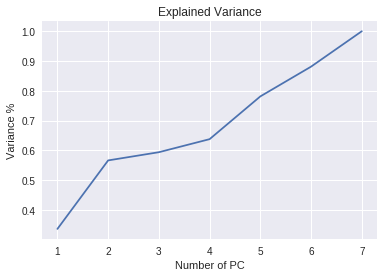

In [79]:
# Importância de cada pc
significance = np.cumsum(np.abs(val)/val.sum())
plt.figure()
plt.plot(np.arange(7)+1, significance)
plt.title('Explained Variance')
plt.xlabel('Number of PC')
plt.ylabel('Variance %')
plt.show()

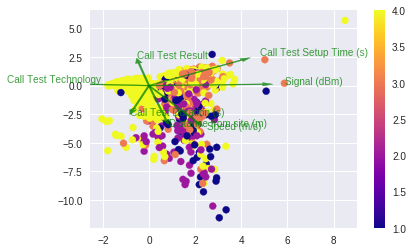

In [96]:
plt.scatter(pc.iloc[:,0],pc.iloc[:,1], c=datahw01['MOS'], cmap='plasma')

for i in range(len(phi)):
    # arrows project features as vectors - PC axes
    plt.arrow(0, 0, phi[i, 0]*np.max(pc.iloc[:,0].values), 
                    phi[i, 1]*np.max(pc.iloc[:,1].values),
                    color='g', width=0.08, head_width=0.3, alpha=0.75)
    # text
    plt.text(phi[i,0]*np.max(pc.iloc[:,0])*1.2, 
             phi[i, 1]*max(pc.iloc[:,1])*1.2,
             datahw01.columns.values[i], color='g', alpha=0.75)

plt.colorbar()

In [21]:
#""""gabarito""
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(scaled_datahw01)
# principalDf = pd.DataFrame(data = principalComponents
#              , )
# principalDf

### Informações   RASCUNHO

 - Dados:

929 observações e 9 colunas, totalizando size=8370 com 7 preditores e 4 classes

1 = sucesso no teste = 919  
0 = falhas no teste  = 11

- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |


- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

Links úteis:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html


In [22]:
# unicas ocorrencias
# datahw01['MOS'].nunique()
# busca por valores:
# for i in range(8):
#     print(datahw01.iloc[:,i+1].all()==0)
# grupos:
# grouped = datahw01.groupby('MOS')
# print('mos class:')
# for name, group in grouped:
#     print(name)
#     print(group.shape)
# .dropna .replace .apply

#TODO: descrição do conjunto de amostras utilizado
#TODO: dataframe to excel sem latex symbols